# Federico Andrucci - 000105...

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Variables
file_name = 'mba.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

0. read a market basket database from the csv file provided and
generate a dataframe basket of boolean values with one row
per transaction and one column per distinct item of the
database; the dataframe values must be True if a distinct item
is contained in the transaction
• the file contains one transaction per line, the first
element is the number of items in the transaction,
followed by the items of the transaction, and then a
variable number of empty fields
• the field names in the first row of the csv file are not
relevant
1. ignore the transactions containing a single item (2 points)
2. the column names of the output dataframe are the distinct items
(2 points)
3. show the first five rows of the output dataframe (1 point)
4. show the number of transactions and of distinct items
(1 point)
5. find a value of min_support such that the apriori algorithm
generates at least 8 frequent itemsets with at least 2 items
 (5 points)
• output the result with the message below
• min_support: 0.xxxx - number of itemsets with at least 2
items: nn)
6. find the minimum metric threshold such that at least 10
association rules are extracted from the frequent itemsets found
(5 points)
• use "confidence" as metric and output the line below:
• Metric: "confidence" - min_metric: 0.xxxx - Number of
rules: n
7. print the first 10 rules found, sorted by descending confidence
and support (3 points)
8. plot confidence and support for all the sorted rules found
(3 points)
9. scatter plot the rules by confidence and support, labelling the
points with the index value of the corresponding rule
(hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) (3 points)

## 0. read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction

• _the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields_

• _the field names in the first row of the csv file are not relevant_

In [2]:
# open the file
file = open(file_name, mode='r')

# the transactions are separated by a ','
# we need also to strip the '\n'
transactions = [line.strip('\n').split(separator) for line in file.readlines()]

# the first line is not relevant so we skip it
transactions = transactions[1:]

# the first item in every transaction is a number of the itemns in the transaction, so we want to use it to slice the list,
# removing all empty string and the number itself
for i in range(len(transactions)):
    # the end index is the number of items in the transaction plus one, because we have the number itself at index 0
    end_index = int(transactions[i][0]) + 1
    transactions[i] = transactions[i][1:end_index]

# now we can encode in boolean form with TransactionEncoder
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

basket = pd.DataFrame(encoded_transactions)

## 1. ignore the transactions containing a single item (2 points)

In [3]:
single_item_transactions = []

# iterate over all transactions
for index, transaction in basket.iterrows():

    # if there is one 'True' value
    if np.count_nonzero(transaction) == 1:
        single_item_transactions.append(index)

# drop the single item transactions
basket.drop(index=single_item_transactions, axis=0, inplace=True)

## 2. the column names of the output dataframe are the distinct items (2 points)

In [4]:
basket.columns = encoder.columns_

## 3. show the first five rows of the output dataframe (1 point)

In [5]:
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


## 4. show the number of transactions and of distinct items (1 point)

In [6]:
print(f"There are {basket.shape[0]} transactions and {basket.shape[1]} distinct items")

There are 7676 transactions and 169 distinct items


## 5. find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items  (5 points)

• _output the result with the message below_

• _min_support: 0.xxxx - number of itemsets with at least 2 items: nn)_

In [8]:
# requirements
min_itemsets = 8
min_item_in_itemsets = 2

support_range = np.arange(0.1, 0.01, -0.01)

min_support = 0

for support in support_range:
    print(f"Trying support value {support:.2f}")

    frequent_itemsets = apriori(basket, min_support=support, use_colnames=True)

    itemsets_above_threshold = sum(len(itemset) >= min_item_in_itemsets for itemset in frequent_itemsets.itemsets)

    if itemsets_above_threshold >= min_itemsets:
        min_support = support
        break

if min_support == 0:
    print("No support value found, try again with a different range...")
else:
    print(f"I've selected min_support = {min_support:.2f}, which produced {len(frequent_itemsets)} itemsets, {itemsets_above_threshold} of which had more than {min_item_in_itemsets} items")

Trying support value 0.10
Trying support value 0.09
Trying support value 0.08
Trying support value 0.07
Trying support value 0.06
Trying support value 0.05
I've selected min_support = 0.05, which produced 42 itemsets, 9 of which had more than 2 items


Print output as requested

In [11]:
print(f"min_support: {min_support:.4f} - number of itemsets with at least 2 items: {itemsets_above_threshold}")

min_support: 0.0500 - number of itemsets with at least 2 items: 9


## 6. find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points) 

• _use "confidence" as metric and output the line below:_

• _Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n_

In [9]:
# requierements
min_rules = 10

# reasonable range
confidence_range = np.arange(1, 0.01, -0.01)

min_confidence = 0

for confidence in confidence_range:
    print(f"Trying confidence value {confidence:.2f}")

    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence)

    if len(rules) >= min_rules:
        min_confidence = confidence
        break

if min_confidence == 0:
    print("No rule set met the requierement! Try again with a bigger range")
else:
    print(f"I've selected min_confidence = {min_confidence:.2f}, which produce {len(rules)} rules")

Trying confidence value 1.00
Trying confidence value 0.99
Trying confidence value 0.98
Trying confidence value 0.97
Trying confidence value 0.96
Trying confidence value 0.95
Trying confidence value 0.94
Trying confidence value 0.93
Trying confidence value 0.92
Trying confidence value 0.91
Trying confidence value 0.90
Trying confidence value 0.89
Trying confidence value 0.88
Trying confidence value 0.87
Trying confidence value 0.86
Trying confidence value 0.85
Trying confidence value 0.84
Trying confidence value 0.83
Trying confidence value 0.82
Trying confidence value 0.81
Trying confidence value 0.80
Trying confidence value 0.79
Trying confidence value 0.78
Trying confidence value 0.77
Trying confidence value 0.76
Trying confidence value 0.75
Trying confidence value 0.74
Trying confidence value 0.73
Trying confidence value 0.72
Trying confidence value 0.71
Trying confidence value 0.70
Trying confidence value 0.69
Trying confidence value 0.68
Trying confidence value 0.67
Trying confide

Print output as requested

In [10]:
print(f'Metric: "confidence" - min_metric: {min_confidence:.4f} - Number of rules: {len(rules)}')

Metric: "confidence" - min_metric: 0.2500 - Number of rules: 10


## 7. print the first 10 rules found, sorted by descending confidence and support (3 points)

In [12]:

sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False).reset_index(drop=True)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380
1,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861
2,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035
3,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290
4,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836
6,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823
7,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011
8,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283
9,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187


## 8. plot confidence and support for all the sorted rules found (3 points)

<AxesSubplot:title={'center':'Association Rules'}>

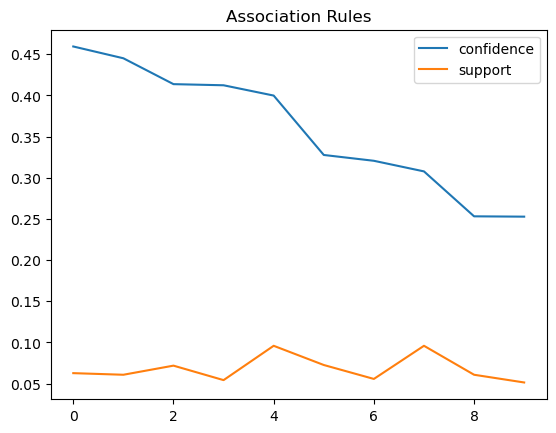

In [13]:
sorted_rules[['confidence', 'support']].plot(title='Association Rules')

## 9. scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule

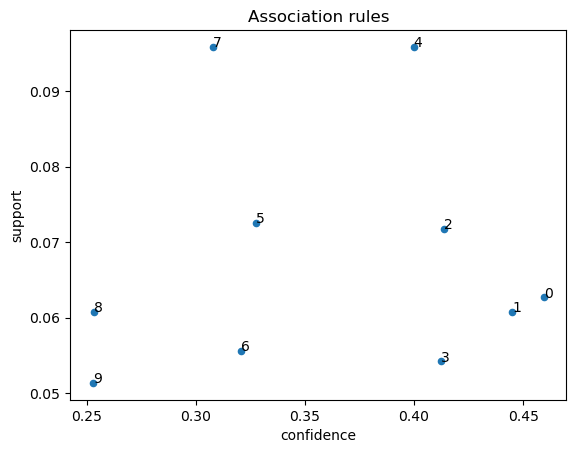

In [14]:
fig = sorted_rules.plot.scatter(x='confidence', y='support', title='Association rules')

for i in range(len(sorted_rules)):
    fig.annotate(text=i, xy=(sorted_rules['confidence'][i], sorted_rules['support'][i]))